In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_column',None)
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
 df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df["TotalCharges"] = df["TotalCharges"].replace([" ", ""], np.nan) # reaplaces all empty and blank cells in the TotalCharge column with NAN

In [78]:
df[df["TotalCharges"].astype(str).str.strip() == ""].sum() # this check for empty cells in the Total Charge column 

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      0.0
TotalCharges          0
Churn                 0
dtype: object

In [79]:
df["TotalCharges"].isna().sum()

11

In [80]:
df = df.dropna(subset=["TotalCharges"])

In [81]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [82]:
df.rename(columns={'SeniorCitizen': 'CitizensStatus'}, inplace=True)

In [83]:
df.head()

,customerID,gender,CitizensStatus,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df["TotalCharges"].isna().sum()

0

In [85]:
df.shape[0]

7032

In [86]:
df.describe()

,CitizensStatus,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# TOTAL CUTOMERS CHURN

In [87]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [88]:
chur_summary_count = pd.DataFrame({
    "Count": df["Churn"].value_counts(),
    "Percentage": (df["Churn"].value_counts(normalize=True) * 100).round(2)
})
print(chur_summary_count)

       Count  Percentage
Churn                   
No      5163       73.42
Yes     1869       26.58


# CHURN BY GENDER

In [89]:
gender_count= df['gender'].value_counts()
Churn_by_gender_yes= df[df['Churn'] == 'Yes']['gender'].value_counts()
Churn_by_gender_no = df[df['Churn'] == 'No']['gender'].value_counts()
sumarry_churn_by_gender = pd.DataFrame({'Count':gender_count, 'Churned':Churn_by_gender_yes, 'Not Churned': Churn_by_gender_no})
print(sumarry_churn_by_gender)

        Count  Churned  Not Churned
gender                             
Female   3483      939         2544
Male     3549      930         2619


# CHURN BY CITIZENSHIP STATUS

In [90]:
df_citizenship_Status = df.groupby('CitizensStatus').size().reset_index(name='count')
print(df_citizenship_Status)

   CitizensStatus  count
0               0   5890
1               1   1142


In [91]:
churn_citizenship_status = df[df['Churn'] == 'Yes']['CitizensStatus'].value_counts()
print(churn_citizenship_status)

CitizensStatus
0    1393
1     476
Name: count, dtype: int64


In [92]:

citizens_count =  df_citizenship_Status.set_index('CitizensStatus')['count']
percentage = (churn_citizenship_status/citizens_count *100).round(2)
sumarry_citizen_churned = pd.DataFrame({'status_count': citizens_count, 'churned': churn_citizenship_status, 'percentage%': percentage})
print(sumarry_citizen_churned)

                status_count  churned  percentage%
CitizensStatus                                    
0                       5890     1393        23.65
1                       1142      476        41.68


# CHURN BY CONTRACT TYPE

In [93]:
contract_type = df['Contract'].value_counts()
churn_by_contract = df[df['Churn'] == 'Yes']['Contract'].value_counts()
percentage = (churn_by_contract/contract_type * 100).round(2)
sumarry_contract_type = pd.DataFrame({'Count': contract_type, 'churned': churn_by_contract, 'percentage churned': percentage})
print(sumarry_contract_type)

                Count  churned  percentage churned
Contract                                          
Month-to-month   3875     1655               42.71
One year         1472      166               11.28
Two year         1685       48                2.85


## CHURN BY TECH SUPPORT

In [94]:
TechSupport_value = df['TechSupport'].value_counts()
TechSupport_churned = df[df['Churn'] == 'Yes']['TechSupport'].value_counts()
percentage_techsupport_churned = (TechSupport_churned/TechSupport_value * 100).round(2)
TechSupport_sumarry = pd.DataFrame({'count': TechSupport_value, 'churned': TechSupport_churned, 'percentage': percentage_techsupport_churned})
print(TechSupport_sumarry)

                     count  churned  percentage
TechSupport                                    
No                    3472     1446       41.65
Yes                   2040      310       15.20
No internet service   1520      113        7.43


# CHURN BY INTERNET SERVICE

In [95]:
Internet_service = df['InternetService'].value_counts()
InternetService_names = Internet_service.index #this takes the count from Internet_service and index them and then stores it as InternetService_name
Internet_service_Churn = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
percentage_churned = (Internet_service_Churn/Internet_service * 100).round(2)
summary_internet_churned = pd.DataFrame({'InternetService': InternetService_names,'counts': Internet_service, 'Churned': Internet_service_Churn, 'percentage': percentage_churned})
summary_internet_churned.index = range(1, len(summary_internet_churned) + 1)
print(summary_internet_churned)

# len(summary_internet_churned) --- This gets the number of rows in your DataFrame.
# range(1, len(...) + 1) --- This creates a sequence of row numbers starting from 1 up to the number of rows.
# why we hav e.index in attached to the dataframe (summary_internet_churned.index) this tells pandas that we want on the defualt
# pandas row index of this dataframe, now this (summary_internet_churned.index = range(1, len(summary_internet_churned) + 1)) tells pandas
# that the variable is already pandas indexed and now turn it to an index starting from 1

  InternetService  counts  Churned  percentage
1     Fiber optic    3096     1297       41.89
2             DSL    2416      459       19.00
3              No    1520      113        7.43


# CHURN BY PAYMENT METHOD

In [96]:
payment_method = df['PaymentMethod'].value_counts()
payment_method_churn = df[df['Churn']=='Yes']['PaymentMethod'].value_counts()
percentage_churn_by_payment_method = (payment_method_churn/payment_method * 100).round(2)
payment_method_summary = pd.DataFrame({'PaymentMethod': payment_method,
                                       'Churned': payment_method_churn,
                                       'Percent': percentage_churn_by_payment_method})
print(payment_method_summary)

                           PaymentMethod  Churned  Percent
PaymentMethod                                             
Electronic check                    2365     1071    45.29
Mailed check                        1604      308    19.20
Bank transfer (automatic)           1542      258    16.73
Credit card (automatic)             1521      232    15.25


# PLOTS

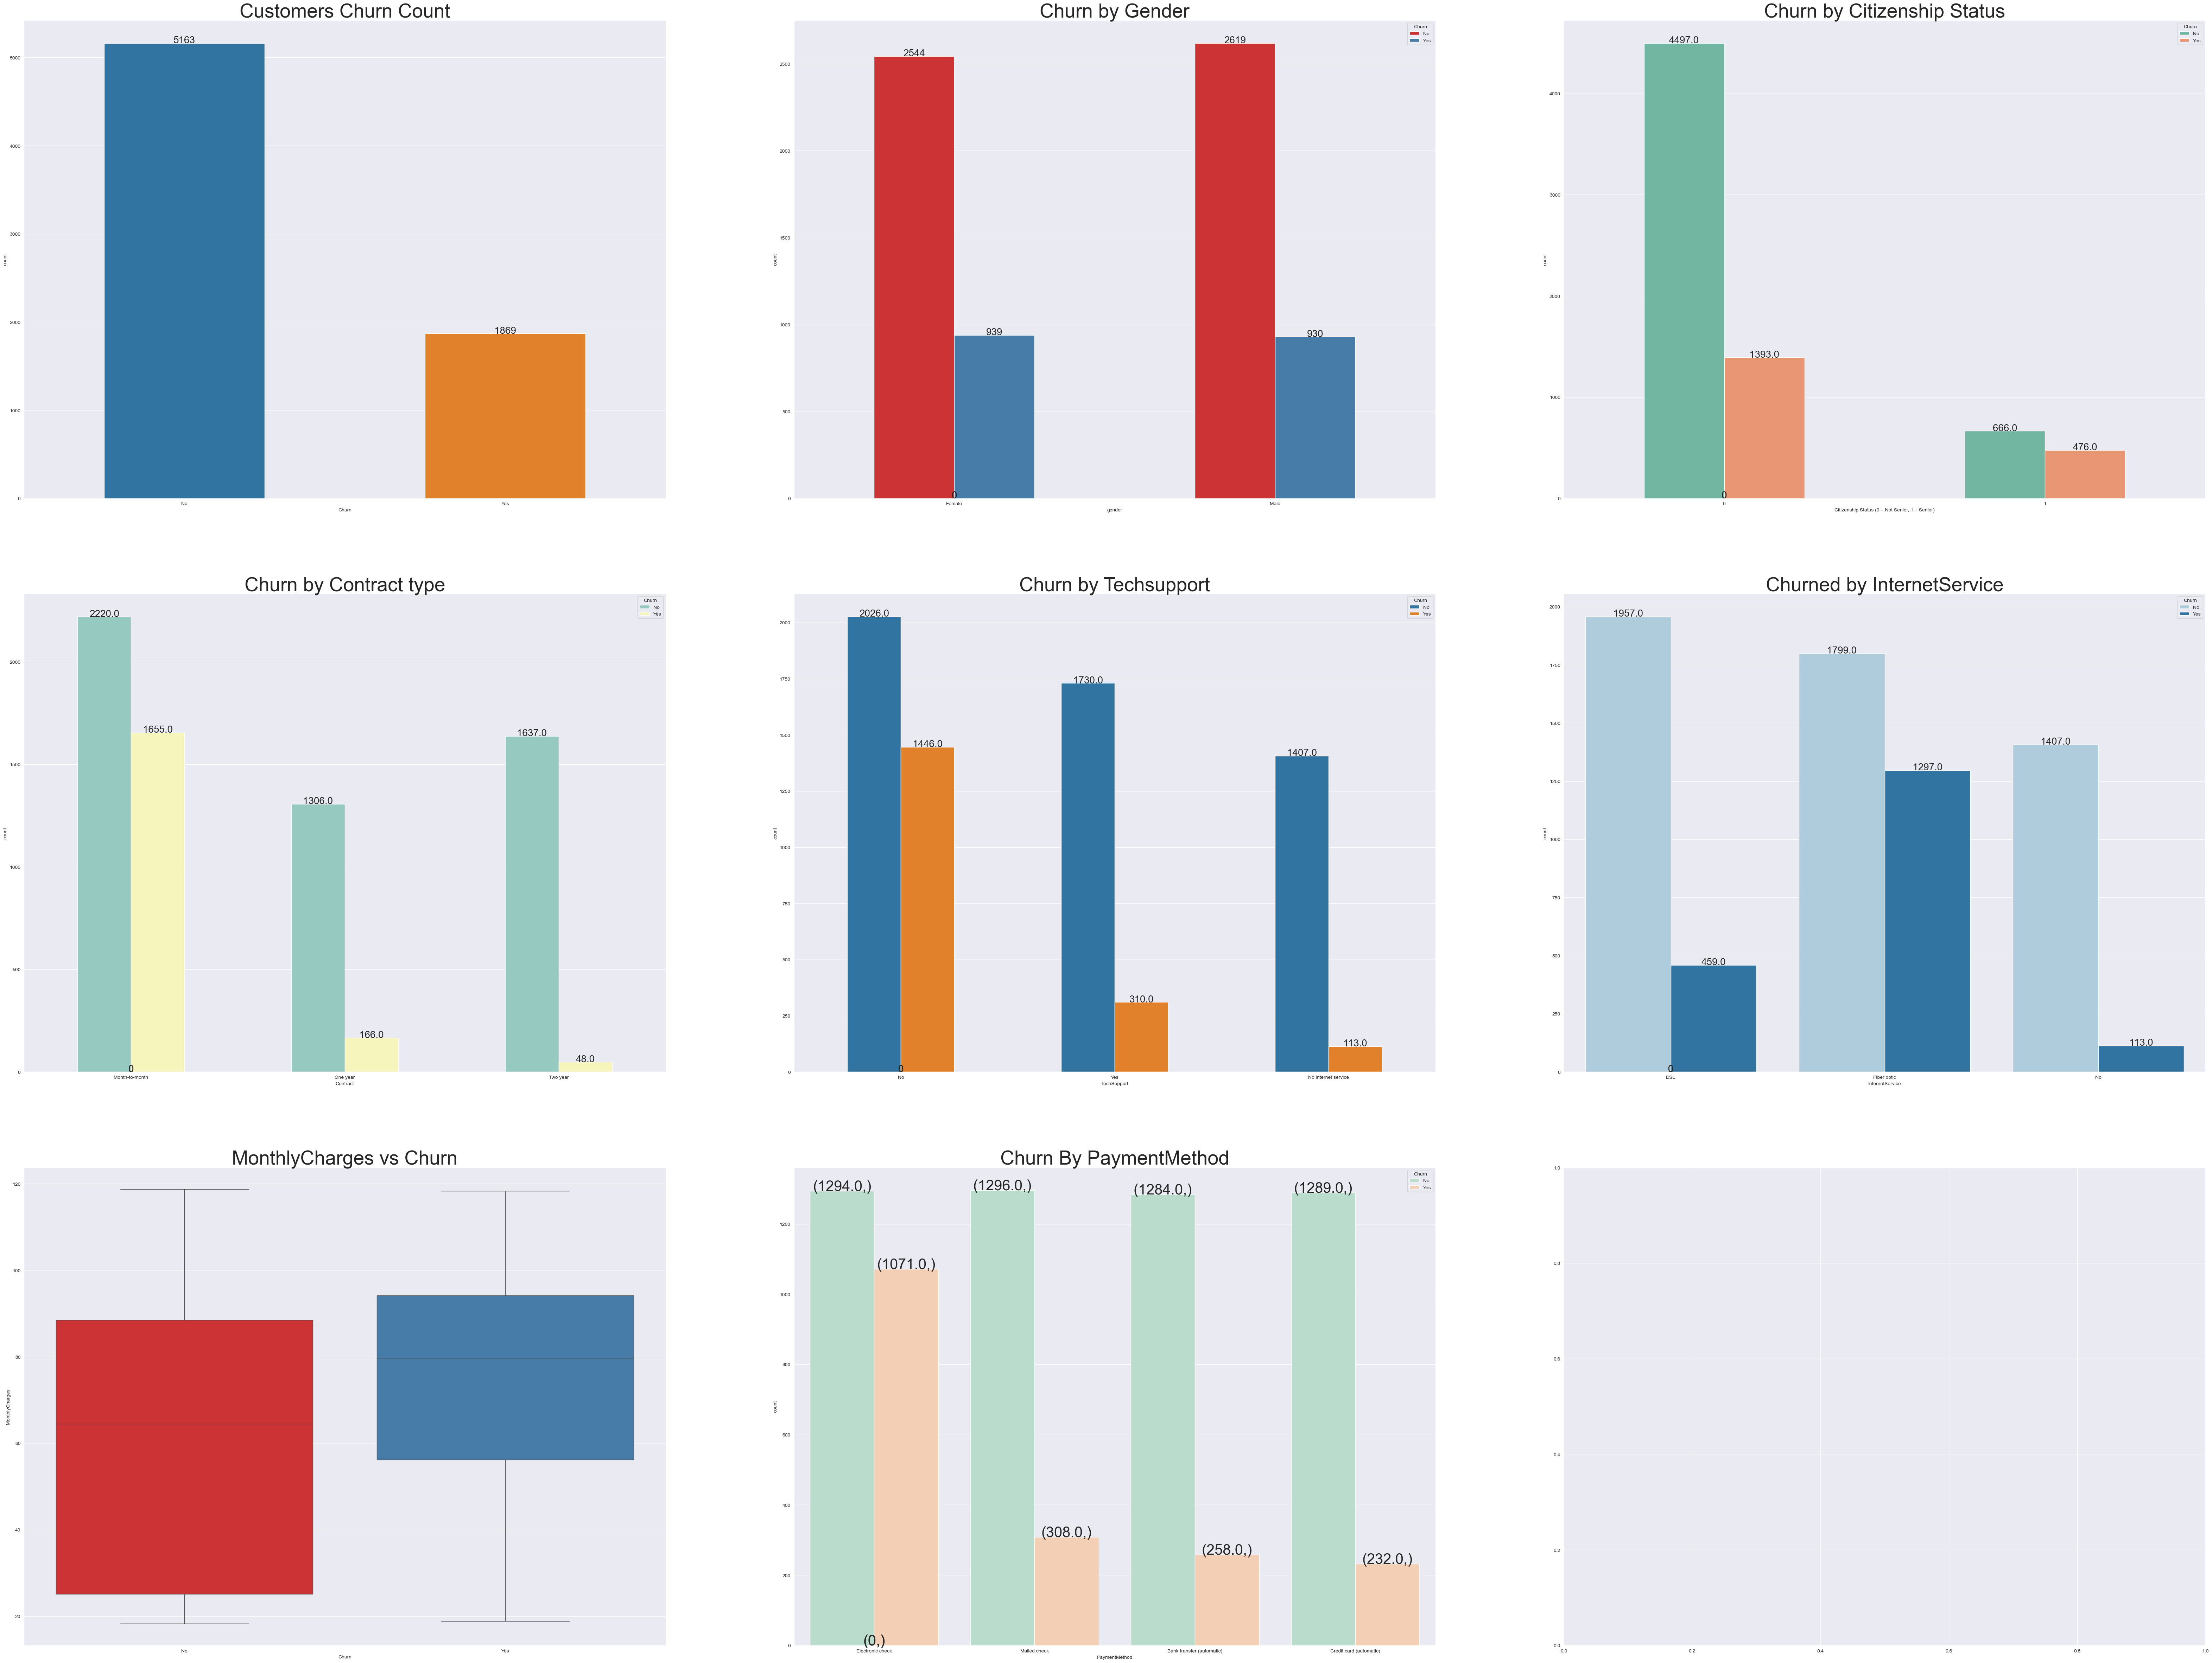

In [97]:
fig, axes = plt.subplots(3,3, figsize=(80,60))
ax1=sns.countplot(df, x = 'Churn', hue = 'Churn', width=0.5, ax =axes[0,0])
ax1.set_title('Customers Churn Count', fontsize = 40)
for bar in ax1.patches: # ax: is your plot, patches: is the list of bars in the chart
    count = int(bar.get_height())  #Gets the height of the bar, which represents the count (number of customers) for that category
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 1,               
        str(count),
        ha='center', 
        fontsize = 20
 ) 
  #ax3.text(...)This adds text (a label) on the chart for each bar.
  #bar.get_x() + bar.get_width()/2
       #Calculates the horizontal (x-axis) position for the label.
       #bar.get_x() is the starting x-position (left edge) of the bar
       #bar.get_width()/2 moves you to the center of the bar
       #So this centers the text horizontally on top of the bar

  #bar.get_height() + 1
  #calculates the vertical (y-axis) position of the text
  #It places the text slightly above the top of the bar
  #+1 just gives some vertical spacing

  #str(count)
     #Converts the number (e.g. 1869) into a string, so it can be shown as a label

ax2 = sns.countplot(df, x = 'gender', hue = 'Churn', width=0.5, ax=axes[0,1], palette='Set1')
ax2.set_title('Churn by Gender', fontsize = 40)
for bar in ax2.patches:
    count =  int(bar.get_height())
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        str(count),
        ha = 'center',
        fontsize = 20
    )


ax3 = sns.countplot(df, x = 'CitizensStatus', hue = 'Churn', width=0.5, ax=axes[0,2], palette='Set2')
ax3.set_title('Churn by Citizenship Status', fontsize = 40)
ax3.set_xlabel('Citizenship Status (0 = Not Senior, 1 = Senior)')
for bar in ax3.patches:
    count = (bar.get_height())
    ax3.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        str(count),
        ha = 'center',
        fontsize = 20
    )



ax4 = sns.countplot(df, x = 'Contract', hue = 'Churn', width=0.5, ax = axes[1,0], palette='Set3')
ax4.set_title('Churn by Contract type', fontsize = 40)
for bar in ax4.patches:
    count = (bar.get_height())
    ax4.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        str(count),
        ha = 'center',
        fontsize = 20
    )


ax5 = sns.countplot(df, x = 'TechSupport', hue = 'Churn', width=0.5, ax = axes[1,1])
ax5.set_title('Churn by Techsupport', fontsize = 40)
for bar in ax5.patches:
    count = (bar.get_height())
    ax5.text(
       bar.get_x() + bar.get_width()/2,
       bar.get_height() + 1,
       str(count),
       ha = 'center',
       fontsize = 20
    )


ax6 =  sns.countplot(df, x = 'InternetService', hue = 'Churn', ax = axes[1,2], palette='Paired')
ax6.set_title('Churned by InternetService', fontsize = 40)
for bar in ax6.patches:
    count = (bar.get_height())
    ax6.text(
    bar.get_x() + bar.get_width()/2,
    bar.get_height() + 1,
    str(count),
    ha = 'center',
    fontsize =  20
    )


ax7 = sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette = 'Set1', ax = axes[2,0])
ax7.set_title('MonthlyCharges vs Churn', fontsize = 40)



ax8 = sns.countplot(df, x = 'PaymentMethod', hue = 'Churn', ax = axes[2,1], palette = 'Pastel2')
ax8.set_title("Churn By PaymentMethod", fontsize = 40)
for bar in ax8.patches:
    count = (bar.get_height()),
    ax8.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        str(count),
        ha = 'center',
        fontsize = 30
    )


# CHURN BY MONTHLYCHARGES

In [98]:
df.groupby('Churn')['MonthlyCharges'].mean().reset_index(name='Average')

,Churn,Average
0,No,61.307408
1,Yes,74.441332


In [99]:
df_max = df['MonthlyCharges'].max()
df_min = df['MonthlyCharges'].min()

min_max = pd.DataFrame({'max': [df_max], 'min': [df_min]})
print(min_max.to_string(index=False))


 # OR


 # df_max = df['MonthlyCharges'].max()
 # df_min = df['MonthlyCharges'].min()

 # min_max = pd.DataFrame({'MonthlyCharges': [df_max, df_min]}, index=['max', 'min'])
 # print(min_max)


   max   min
118.75 18.25


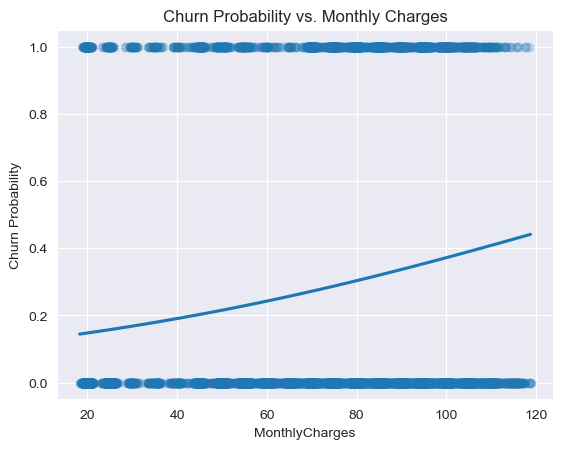

<Figure size 640x480 with 0 Axes>

In [100]:
df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) #labelEcoding for Churn to binary 1 and 0 so we can do a regression plot

import seaborn as sns
sns.regplot(x='MonthlyCharges', y='ChurnBinary', data=df, logistic=True, ci=None, scatter_kws={'alpha':0.2})
plt.title('Churn Probability vs. Monthly Charges')
plt.ylabel('Churn Probability')
plt.xlabel('MonthlyCharges')
plt.show()
plt.savefig('Churn Probability vs. Monthly Charges.png', dpi=300, bbox_inches='tight')

In [101]:
#the graph above show a non-linear realtionship between monthly charges and possibility of customer churn
#from the graph it shows that customers who pay higher churn more, as monthly charges increases churning by customers are more even though not linear 

In [102]:
# Create ChargeRange column based on MonthlyCharges (feature engineering)
df['ChargeRange'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 20, 50, 80, 120],
    labels=['0-20', '20–50', '50–80', '80–120'],
    ordered = True
)

# or

# bins = [0, 20, 50, 80, 120]  ---      this defines the the rage or categories that montly charge will be grouped into.
# labels = ['0-20', '20–50', '50–80', '80–120]     ---       give the categories a label

# df['ChargeRange'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)  --- this creates the ChargeRnage column with these features 


# Calculate churn rate per range
ChargeRange_count = df['ChargeRange'].value_counts(sort = False)
ChargeRange_index = ChargeRange_count.index
churned_by_range = df[df['Churn'] == 'Yes']['ChargeRange'].value_counts(sort = False)
percentage_range = (churned_by_range/ChargeRange_count * 100).round(2)
ChargeRange_summary = pd.DataFrame({'Charge Range $': ChargeRange_index, 'count': ChargeRange_count, 'Churned': churned_by_range, 'percentage%': percentage_range})
ChargeRange_summary.index = range(1, len(ChargeRange_summary) + 1)


def category(columns):
    if columns['ChargeRange'] == '0-20':
        return 'Low Monthly Charge'
    elif columns['ChargeRange'] == '20–50':
        return 'Medium Monthly Charge'
    elif columns['ChargeRange'] == '50–80':
        return 'High Monthly Charge'
    else:
        return 'Very High Monthly Charge'

df['ChargeCategory'] = df.apply(category, axis=1)


print(ChargeRange_summary)


  Charge Range $  count  Churned  percentage%
1           0-20    653       58         8.88
2          20–50   1640      303        18.48
3          50–80   2074      602        29.03
4         80–120   2665      906        34.00


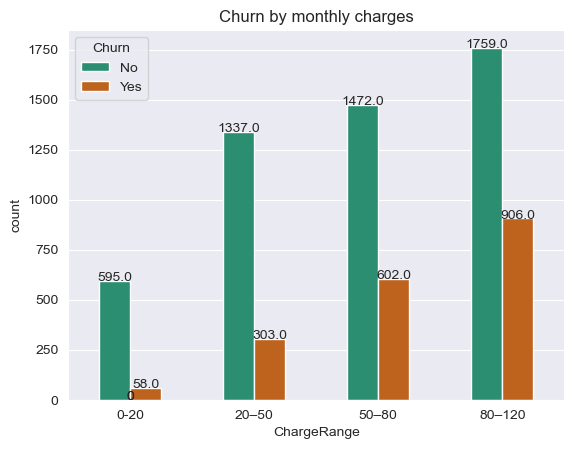

In [103]:
ax_Mcharges = sns.countplot(df, x = 'ChargeRange', hue = 'Churn', width = 0.5, palette = 'Dark2')
ax_Mcharges.set_title('Churn by monthly charges')
for bar in ax_Mcharges.patches:
    count = (bar.get_height())
    ax_Mcharges.text(
    bar.get_x() + bar.get_width()/2,
    bar.get_height() + 1,
    str(count),
    ha = 'center'
    )

plt.show()

# CHURN BY CONTRACT TYPE AND TOTALCHARGE

In [104]:
df.head()

,customerID,gender,CitizensStatus,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary,ChargeRange,ChargeCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,20–50,Medium Monthly Charge
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,50–80,High Monthly Charge
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,50–80,High Monthly Charge
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,20–50,Medium Monthly Charge
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,50–80,High Monthly Charge


In [105]:
df['TotalCharges'].max()
df['TotalCharges'].min()
total_charge_summary = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum'],
    'TotalCharges': [df['TotalCharges'].min(), df['TotalCharges'].max()]
})
print(total_charge_summary)

  Statistic  TotalCharges
0   Minimum          18.8
1   Maximum        8684.8


In [106]:
# bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500,
        # 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000]

# labels = ['0-500', '500-1000', '1000-1500', '1500-2000',
          # '2000-2500', '2500-3000', '3000-3500', '3500-4000',
          # '4000-4500', '4500-5000', '5000-5500', '5500-6000',
          # '6000-6500', '6500-7000', '7000-7500', '7500-8000',
          # '8000-8500', '8500-9000']

# df['TotalChargeRange'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, ordered=False)



# or


# step = 500 --- comment!!
# max_val = df['TotalCharges'].max()

# Create bins from 0 to just above the max TotalCharges --- comment!!
# bins = list(range(0, int(max_val) + step, step))
# labels = [f"{i}-{i + step}" for i in bins[:-1]]

# df['TotalChargeRange'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels)


# or


# Step size---commen!!
# step = 500

# Upper limit: round up to the next 500 based on the max TotalCharges---comment!!
# max_val = int(np.ceil(df['TotalCharges'].max() / step)) * step

# Create bins from 0 to max_val in steps of 500----comment!!
# bins = list(range(0, max_val + step, step))

# Create labels like '0-500', '500-1000', etc.-- comment!!
# labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

# Cut the TotalCharges column into these bins --- comment!!
# df['TotalChargeRange'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, ordered=False)


# or


bins = list(range(0, 9500, 500)) #Creates a list of numbers starting from 0 up to (but not including) 9500, with a step of 500.
labels = [f'{i}-{i+500}' for i in bins[:-1]]  #('{i}-{i+500}')----For each value i, it creates a string like "0-500", "500-1000",
                                                # ( for i in bins[:-1]) ---- this means for all the range in bins but do not create a step for the last one in the bin,

df['TotalChargeRange'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels)



In [107]:
df.head()

,customerID,gender,CitizensStatus,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary,ChargeRange,ChargeCategory,TotalChargeRange
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,20–50,Medium Monthly Charge,0-500
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,50–80,High Monthly Charge,1500-2000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,50–80,High Monthly Charge,0-500
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,20–50,Medium Monthly Charge,1500-2000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,50–80,High Monthly Charge,0-500


In [108]:
# counts = df.groupby(['TotalChargeRange', 'Contract'], observed=True)['customerID'].count().unstack()

# churn_pct = df.pivot_table(
    # index='TotalChargeRange',
    # columns='Contract',
    # values='Churn',
    # aggfunc=lambda x: (x == 'Yes').mean().round(2),
    # observed=True
# )

# combined = counts.astype(str) + ' (' + (churn_pct.fillna(0) * 100).astype(int).astype(str) + '%)'
# print(combined)


# Count
count_table = df.pivot_table(
    index='TotalChargeRange',
    columns='Contract',
    values='customerID',
    aggfunc='count',
    observed=True
)

# Churn %
churn_table = df.pivot_table(
    index='TotalChargeRange',
    columns='Contract',
    values='Churn',
    aggfunc=lambda x: (x == 'Yes').mean(),
    observed=True
) * 100

# Rename columns
count_table.columns = [f'{col} Count' for col in count_table.columns]
churn_table.columns = [f'{col} Churn %' for col in churn_table.columns]

# Combine
final_table = pd.concat([count_table, churn_table], axis=1).round(1)
print(final_table)


                  Month-to-month Count  One year Count  Two year Count  \
TotalChargeRange                                                         
0-500                           1692.0           192.0           116.0   
500-1000                         552.0           182.0           159.0   
1000-1500                        371.0           134.0           263.0   
1500-2000                        258.0           104.0           153.0   
2000-2500                        232.0            92.0            35.0   
2500-3000                        171.0            93.0            29.0   
3000-3500                        133.0            95.0            66.0   
3500-4000                        107.0            78.0            77.0   
4000-4500                         89.0            80.0            83.0   
4500-5000                         80.0            80.0           101.0   
5000-5500                         55.0            75.0            74.0   
5500-6000                         57.0

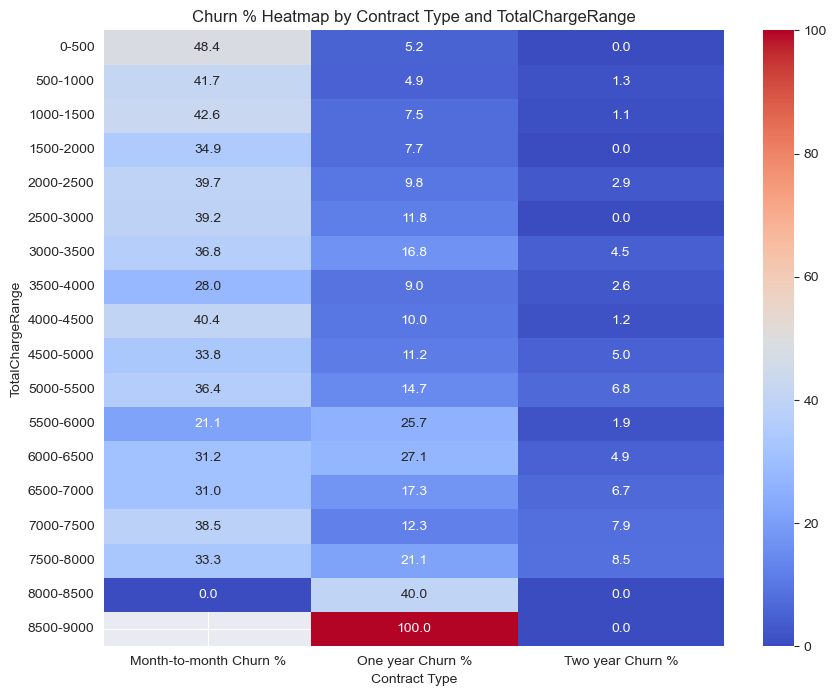

In [109]:


# Prepare just the churn % part
churn_pct = final_table[[col for col in final_table.columns if 'Churn' in col]]
churn_pct.columns = [col.replace(' Churn %', '') for col in churn_pct.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(churn_pct, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Churn % Heatmap by Contract Type and TotalChargeRange")
plt.ylabel("TotalChargeRange")
plt.xlabel("Contract Type")
plt.show()


In [110]:
df.to_csv('telecom_churned_data.csv', index=False)